In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\NIMMAGADDA SUNIL\Desktop\level 02\Dataset.csv')

In [29]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [45]:
restaurant_chains = df.groupby ("Restaurant Name").size().reset_index(name="Chain Count") 
restaurant_chains = restaurant_chains[restaurant_chains["Chain Count"]>1]


In [55]:
 restaurant_chains = restaurant_chains.sort_values(by="Chain Count", ascending=False)


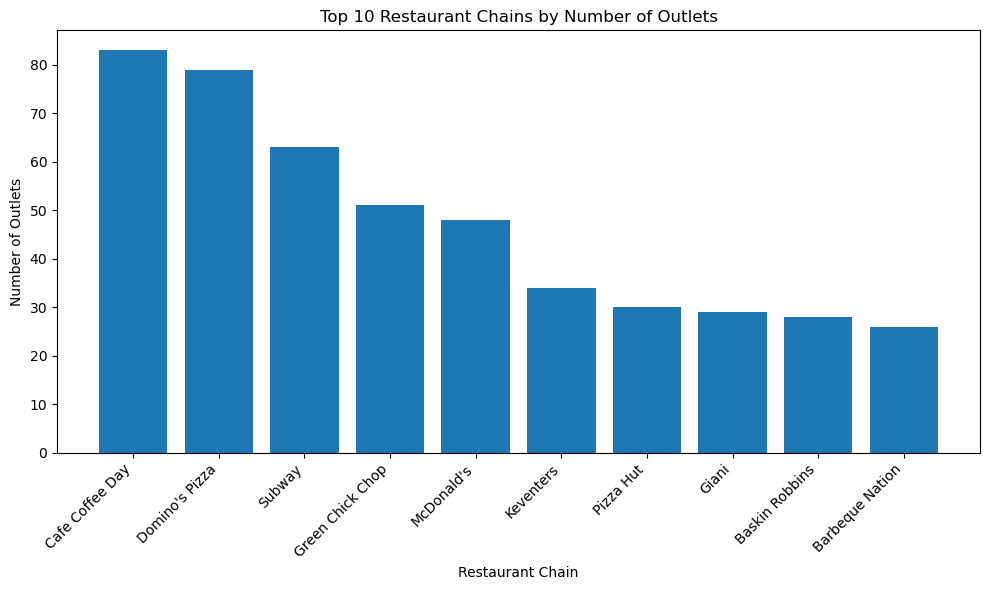

In [49]:
plt.figure(figsize = (10,6))

plt.bar(restaurant_chains["Restaurant Name"] [:10], restaurant_chains["Chain Count"][:10]) 
plt.xticks(rotation=45, ha='right')

plt.xlabel("Restaurant Chain")

plt.ylabel("Number of Outlets")

plt.title("Top 10 Restaurant Chains by Number of Outlets")

plt.tight_layout()

plt.show()

In [79]:
chain_counts = df['Restaurant Name'].value_counts()

restaurant_chains = chain_counts [chain_counts > 1]

print("Restaurant Chains:")

print(restaurant_chains)

Restaurant Chains:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


In [113]:
chain_stats = df.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum'})

chain_stats = chain_stats.sort_values(by = 'Aggregate rating', ascending=False)

top_chains = chain_stats.head (10)

print("Top 10 Restaurant Chains:")

print(top_chains)

Top 10 Restaurant Chains:
                                Aggregate rating  Votes
Restaurant Name                                        
Restaurant Mosaic @ The Orient               4.9     85
Ministry of Crab                             4.9    203
Miann                                        4.9    281
Shorts Burger and Shine                      4.9    820
Milse                                        4.9    754
Yellow Dog Eats                              4.9   1252
Duck & Waffle                                4.9    706
Gaga Manjero                                 4.9     95
Mirchi And Mime                              4.9   3244
McGuire's Irish Pub & Brewery                4.9   2238


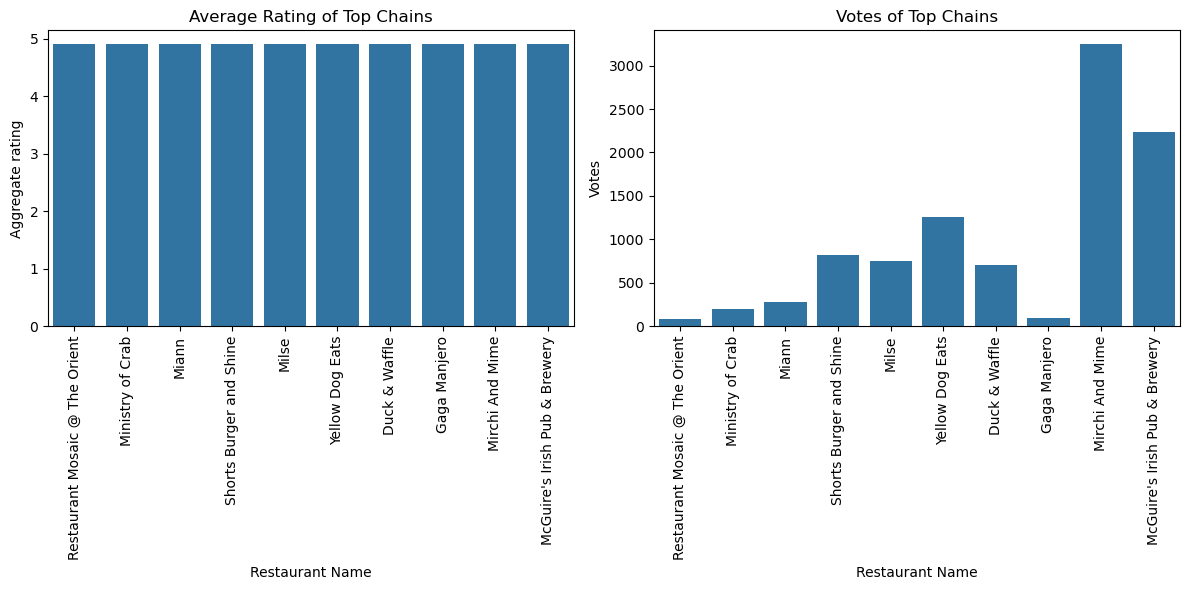

In [109]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_chains.index, y=top_chains['Aggregate rating'])
plt.xticks(rotation=90)
plt.title('Average Rating of Top Chains')

plt.subplot(1, 2, 2)
sns.barplot(x=top_chains.index, y=top_chains['Votes'])
plt.xticks(rotation=90)
plt.title('Votes of Top Chains')

plt.tight_layout()
plt.show()